In [49]:
gain_table = {
    u"平手/半球":"-0.25",
    u"半球":"-0.5",
    u"半球/一球":"-0.75",
    u"一球":"-1",
    u"一球/球半":"-1.25",
    u"球半":"-1.5",
    u"球半/两球":"-1.75",
    u"两球":"-2",
    u"两球/两球半":"-2.25",
    u"两球半":"-2.5",
    u"两球半/三球":"-2.75",
    u"三球":"-3",
    u"三球/三球半":"-3.25",
    u"三球半":"-3.5",
    u"三球半/四球":"-3.75",
    u"四球":"-4",
    u"四球/四球半":"-4.25",
    u"四球半":"-4.5",
    u"四球半/五球":"-4.75",
    u"五球":"-5",
    u"平手":"0",
    u"undefined":"0",
    u"受平手/半球":"0.25",
    u"受半球":"0.5",
    u"受半球/一球":"0.75",
    u"受一球":"1",
    u"受一球/球半":"1.25",
    u"受球半":"1.5",
    u"受球半/两球":"1.75",
    u"受两球":"2",
    u"受两球/两球半":"2.25",
    u"受两球半":"2.5",
    u"受两球半/三球":"2.75",
    u"受三球":"3",
    u"受三球/三球半":"3.25",
    u"受三球半":"3.5",
    u"受三球半/四球":"3.75",
    u"受四球":"4",
    u"受四球/四球半":"4.25",
    u"受四球半":"4.5",
    u"受四球半/五球":"4.75",
    u"受五球":"5"
}

#data format
def NemoCfgMongoClient():
    #user = "root"
    #pw   = "bYKH2Utx47Nw4P"
    host = "0.0.0.0"
    port = 27017
    from pymongo import MongoClient
    uri = "mongodb://%s:%s" % (host, port)
    client = MongoClient(uri)
    return client
client = NemoCfgMongoClient()
X_train = []
Y_train = []
Y_train_gain = []
def in_data_format(doc):
    return [float(gain_table[doc["match_gain"]]),float(doc["win_rate"]),float(doc["draw_rate"]),float(doc["lost_rate"])]
    #return [float(doc["win_rate"]),float(doc["draw_rate"]),float(doc["lost_rate"])]
    #return [float(doc["home_water"]),float(doc["guest_water"]),float(gain_table[doc["match_gain"]]),float(doc["win_rate"]),float(doc["draw_rate"]),float(doc["lost_rate"])]
def out_data_format(doc):
    result = doc["score"].split(":")
    home_score = int(result[0])
    guest_socre = int(result[1])
    if home_score>guest_socre:
        return 3
    elif home_score==guest_socre:
        return 1
    else:
        return 0

def out_data_gain_format(doc):
    result = doc["score"].split(":")
    home_score = float(result[0])
    guest_socre = float(result[1])
    gain = float(gain_table[doc["match_gain"]])
    if home_score+gain>guest_socre:
        return 3
    elif home_score+gain==guest_socre:
        return 1
    else:
        return 0
    
for doc in client.data_500wan.recent_games.find():
    try:
        X_train.append(in_data_format(doc))
        Y_train.append(out_data_format(doc))
        Y_train_gain.append(out_data_gain_format(doc))
    except:
        print doc
        continue
print len(X_train)
print len(Y_train)
print len(Y_train_gain)



{u'home_team': u'\u79d1\u6d1b\u79d1\u6d1b', u'guest_water': u'3.40', u'pay_rate': u' ', u'match_round': u'\u5341\u516d\u5f3a', u'draw_rate': u' ', u'home_water': u'2.30', u'gamble_company': u'Bet365', u'win_rate': u'94.1%', u'game_type': u'\u89e3\u653e\u8005\u676f', u'lost_rate': u' ', u'match_time': u'08-09 08:45', u'match_gain': u'3.00', u'guest_team': u'\u79d1\u6797\u8482\u5b89', u'score': u'1:0', u'_id': ObjectId('5b6c6a1d9dc6d663a3781169')}
{u'home_team': u'\u5f17\u62c9\u95e8\u6208', u'guest_water': u'3.80', u'pay_rate': u' ', u'match_round': u'\u5341\u516d\u5f3a', u'draw_rate': u' ', u'home_water': u'2.10', u'gamble_company': u'Bet365', u'win_rate': u'94.2%', u'game_type': u'\u89e3\u653e\u8005\u676f', u'lost_rate': u' ', u'match_time': u'08-09 08:45', u'match_gain': u'3.10', u'guest_team': u'\u514b\u9c81\u585e\u7f57', u'score': u'0:2', u'_id': ObjectId('5b6c6a1d9dc6d663a378116a')}
17076
17076
17076


In [50]:
from  sklearn import preprocessing  
#scaler=preprocessing.StandardScaler().fit(X_train) 
#X_train=scaler.transform(X_train)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, train_size = 0.8,random_state=2) #train 80%, test 20%


In [51]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', activation='relu', alpha=1e-5,
                    hidden_layer_sizes=(50, 50), random_state=1)
clf = clf.fit(X_train, Y_train)
print( clf.score(X_test, Y_test) )
for test in X_test:
    res = clf.predict([test])
    if res[0] == 1:
        print test
        print clf.predict_proba([test])
    

0.5362997658079626


In [52]:
def expect_cal(proba,rate):
    cal = lambda percent,acurr_rate: percent*(acurr_rate -1) - (1-percent)
    return [cal(proba[i],rate[i]) for i in range(0,len(proba))]

print clf.n_layers_
print clf.n_iter_
print clf.loss_
print clf.out_activation_

for doc in client.data_500wan.predict.find():
    try:
        data = in_data_format(doc)
        in_data = [data]#scaler.transform([data])
        proba_result = clf.predict_proba(in_data)
        expect_result = expect_cal(proba_result[0],[float(doc["lost_rate"]),float(doc["draw_rate"]),float(doc["win_rate"])])
        if max(expect_result)!=0:
            print "%s:%s"%(doc["home_team"],doc["guest_team"])
            print clf.predict(in_data)
            print clf.predict_proba(in_data)
            print expect_result
    except:
        continue

4
14
0.9853069132199284
softmax
卡塔尔亚足:乌兹别亚
[0]
[[0.45405966 0.25752776 0.28841258]]
[-0.11458365831082812, -0.07290008021743, -0.07707973727955808]
叙利亚亚足:中国亚
[0]
[[0.44073117 0.26668624 0.29258258]]
[-0.09650109479923141, -0.1466040219119118, -0.04910660336888428]
莫尔德:希伯尼安
[3]
[[0.18294941 0.24569517 0.57135542]]
[-0.08525294604699452, -0.07864312716157507, -0.05154999762220719]
巴塞尔:维迪斯
[3]
[[0.17999914 0.24958741 0.57041345]]
[-0.1450040758185841, 0.04826713401920224, -0.08163435321937773]
马里博尔:流浪者
[3]
[[0.27566686 0.26758227 0.45675087]]
[-0.007599301186156815, -0.1303576176956165, -0.04082317774577948]
伯恩利:伊斯坦布
[3]
[[0.23487127 0.26170804 0.50342069]]
[-0.013540674075585235, -0.18870506139622156, 0.006841374423724345]
桑德兰:谢周三
[3]
[[0.33267758 0.27098595 0.39633647]]
[-0.0019672546776076105, -0.05154917669135051, -0.028975651662675128]
帕梅拉斯:巴伊亚
[3]
[[0.12547794 0.20929378 0.66522828]]
[0.003823535380510945, -0.16282488701349718, -0.04207127704363284]
博塔弗戈:亚国民
[3]
[[0.07997581 0.18070

In [122]:
exp_train = []
for item in X_train:
    proba_result = clf.predict_proba([item])
    expect_result = expect_cal(proba_result[0],[item[3],item[2],item[1]])
    exp_train.append(expect_result)
    
#model of expectation
#from sklearn import tree
#clf_exp = tree.DecisionTreeClassifier()
#clf_exp = clf_exp.fit(exp_train, Y_train)
from sklearn.neural_network import MLPClassifier
clf_exp = MLPClassifier(solver='sgd', activation='relu', alpha=1e-5,
                    hidden_layer_sizes=(8, 3), random_state=1)
clf_exp = clf_exp.fit(exp_train, Y_train)
exp_test = []
for item in X_test:
    proba_result = clf.predict_proba([item])
    expect_result = expect_cal(proba_result[0],[item[3],item[2],item[1]])
    exp_test.append(expect_result)
print( clf_exp.score(exp_test, Y_test) )

0.5374149659863946


In [124]:
rates = [[item[3],item[2],item[1]] for item in X_train]
import numpy as np
from sklearn.manifold import TSNE
X = np.array(rates)
X_embedded = TSNE(n_components=2, init='pca', random_state=0).fit_transform(X)


[[-19.41443634033203, -65.49665069580078], [-60.09432601928711, -48.05149841308594], [-46.62359619140625, 66.08760833740234], [7.237213134765625, 70.83228302001953]]


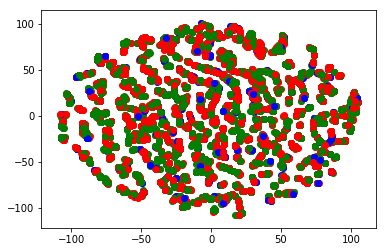

In [164]:
import matplotlib.pyplot as plt
color_list = ['r','b','gray','g']
print X_embedded[:4]
for iter_cnt in range(0,len(X_embedded)):
    color = color_list[Y_train[iter_cnt]]
    plt.scatter(X_embedded[iter_cnt][0], X_embedded[iter_cnt][1], c=color)
plt.show()


In [5]:
from  sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(X_train) 
X_train=scaler.transform(X_train)
rates = [[item[3],item[2],item[1]] for item in X_train]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
color_list = ['r','b','gray','g']
for iter_cnt in range(0,len(rates)):
    color = color_list[Y_train[iter_cnt]]
    plt.scatter(rates[iter_cnt][0], rates[iter_cnt][1], rates[iter_cnt][2], c=color)
plt.show()


[[0.25, 3.2, 3.5, 2.14], [0.5, 4.0, 3.5, 1.95], [1.0, 6.5, 3.8, 1.53], [0.0, 2.9, 3.3, 2.38], [-0.5, 1.91, 3.3, 4.2]]


/usr/lib64/python2.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 1 Axes>

In [7]:
print rates[:5]

[[-0.5530284330426972, -0.2533506747217258, 0.2059230397036199], [-0.5962275078441931, -0.2533506747217258, 0.5290813283621346], [-0.6917201995106576, -0.0685256381343832, 1.5389509804199935], [-0.49846118066186046, -0.37656736577995437, 0.08473868145667672], [-0.08465951677384753, -0.37656736577995437, -0.31516970075823536]]


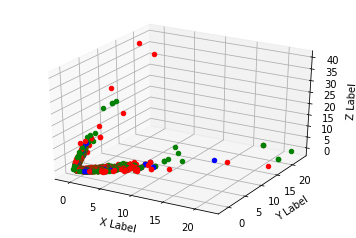

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iter_cnt in range(0,len(rates)):
    color = color_list[Y_train[iter_cnt]]
    ax.scatter(rates[iter_cnt][0], rates[iter_cnt][1], rates[iter_cnt][2], c=color)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


{u'home_team': u'\u79d1\u6d1b\u79d1\u6d1b', u'guest_water': u'3.40', u'pay_rate': u' ', u'match_round': u'\u5341\u516d\u5f3a', u'draw_rate': u' ', u'home_water': u'2.30', u'gamble_company': u'Bet365', u'win_rate': u'94.1%', u'game_type': u'\u89e3\u653e\u8005\u676f', u'lost_rate': u' ', u'match_time': u'08-09 08:45', u'match_gain': u'3.00', u'guest_team': u'\u79d1\u6797\u8482\u5b89', u'score': u'1:0', u'_id': ObjectId('5b6c6a1d9dc6d663a3781169')}
{u'home_team': u'\u5f17\u62c9\u95e8\u6208', u'guest_water': u'3.80', u'pay_rate': u' ', u'match_round': u'\u5341\u516d\u5f3a', u'draw_rate': u' ', u'home_water': u'2.10', u'gamble_company': u'Bet365', u'win_rate': u'94.2%', u'game_type': u'\u89e3\u653e\u8005\u676f', u'lost_rate': u' ', u'match_time': u'08-09 08:45', u'match_gain': u'3.10', u'guest_team': u'\u514b\u9c81\u585e\u7f57', u'score': u'0:2', u'_id': ObjectId('5b6c6a1d9dc6d663a378116a')}


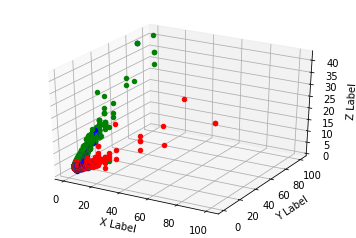

In [157]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
def out_data_format(doc):
    result = doc["score"].split(":")
    home_score = int(result[0])
    guest_socre = int(result[1])
    if home_score>guest_socre:
        return 2
    elif home_score==guest_socre:
        return 1
    else:
        return 0

color_list = ['r','b','g']
for doc in client.data_500wan.recent_games.find():
    try:
        color = color_list[out_data_format(doc)]
        x = float(doc["win_rate"])
        y = float(doc["lost_rate"])
        z = float(doc["draw_rate"])
        ax.scatter(x, y, z, c=color)
    except:
        print doc
        continue
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
